<img src="https://www.google.com/url?sa=i&url=https%3A%2F%2Fin.linkedin.com%2Fschool%2Faccredianedu%2F&psig=AOvVaw0XEuKC7Q4AbwgQ__KgqchX&ust=1699535192166000&source=images&cd=vfe&opi=89978449&ved=0CBIQjRxqFwoTCJjNr5C8tIIDFQAAAAAdAAAAABAL">

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br> 
**4.** [**Fetching data**](#Section4)<br> 
  - **4.1** [**Department data**](#Section41)
  - **4.2** [**Employee details data**](#Section42)
  - **4.2** [**Employee data**](#Section4)
  
**5.** [**Data merging**](#Section5)<br>
**6.** [**Handling missing values**](#Section6)<br>
**7.** [**Exploratory Data Analysis**](#Section7)<br>
**8.** [**Feature engineering**](#Section8)<br>
**9.** [**Model evaluation**](#Section9)<br>
**10.** [**Threshold 0.7**](#Section10)<br>
**11.** [**Hyper parameter tuning**](#Section11)<br>
**12.** [**Cross validation**](#Section12)<br>
**13.** [**Unseen Data**](#Section13)<br>
**14.** [**Conclusion**](#Section14)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees

<center><img src="https://projects.accredian.com/capstone2/hr.png"></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install xgboost

In [3]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [4]:
import mysql.connector as sql

---
<a name = Section4></a>
# **4. Fetching data**
---

<a name = Section41></a>
### **4.1 Department data**

In [5]:
#Downloading the dataset from the Capstone dtabase in SQL
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM department_data')

table_rows = cursor.fetchall()

dept_data = pd.DataFrame(table_rows)

dept_data=pd.read_sql_query("SELECT * FROM department_data ",connection)

dept_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [6]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dept_id    11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [7]:
dept_data.nunique()

dept_id      11
dept_name    11
dept_head    11
dtype: int64

In [8]:
dept_data['dept_name'].unique()

array(['IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance',
       'Procurement', 'Admin', 'Management', 'Marketing', 'Product'],
      dtype=object)

In [9]:
dept_data['dept_head'].unique()

array(['Henry Adey', 'Edward J Bayley', 'Micheal Zachrey',
       'Sushant Raghunathan K', 'Amelia Westray', 'Aanchal J',
       'Louie Viles', 'Evelyn Tolson', 'Ellie Trafton', 'Reuben Swann',
       'Darcy Staines'], dtype=object)

In [10]:
dept_data['dept_id'].unique()

array(['D00-IT', 'D00-SS', 'D00-TP', 'D00-ENG', 'D00-SP', 'D00-FN',
       'D00-PR', 'D00-AD', 'D00-MN', 'D00-MT', 'D00-PD'], dtype=object)

### Observations on dept_data:
1. Dataset has total 11 entries and 3 columns which are dept_id, dept_name and dept_head.
2. All three columns have datatype object.
3. No null values are present in the dataset.
4. No duplicates are found in the dataset.
5. There are total 11 departments in the company-IT', 'Sales', 'Temp', 'Engineering', 'Support', 'Finance','Procurement', 'Admin', 'Management', 'Marketing', 'Product'
6. Total 11 heads for 11 departments:Henry Adey', 'Edward J Bayley', 'Micheal Zachrey','Sushant Raghunathan K', 'Amelia Westray', 'Aanchal J','Louie Viles', 'Evelyn Tolson', 'Ellie Trafton', 'Reuben Swann','Darcy Staines

<a name = Section42></a>
### **4.2 Employee details data**

In [11]:
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM employee_details_data')

table_rows = cursor.fetchall()

employee_details = pd.DataFrame(table_rows)

employee_details=pd.read_sql_query("SELECT * FROM employee_details_data ",connection)

employee_details.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [12]:
employee_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [13]:
employee_details.describe()

,employee_id,age
count,14245.000000,14245.000000
mean,112123.050544,32.889926
std,8500.457343,9.970834
min,100101.000000,22.000000
25%,105775.000000,24.000000
50%,111298.000000,29.000000
75%,116658.000000,41.000000
max,148988.000000,57.000000


In [14]:
employee_details.isnull().sum()

employee_id       0
age               0
gender            0
marital_status    0
dtype: int64

In [15]:
employee_details['marital_status'].unique()

array(['Married', 'Unmarried'], dtype=object)

In [16]:
employee_details['marital_status'].value_counts()

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64

In [17]:
employee_details['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [18]:
employee_details['gender'].value_counts()

Male      9382
Female    4863
Name: gender, dtype: int64

## Observations on employee_details_data:
1. There are total 14245 entries in the dataset and 4 columns which are employee_id, age, gender and marital_status.
2. Employee_id and age has datatype integer and gender and marital status have datatype object.
3. No null values are present in the dataset.
4. Employees age ranges from minimum 22 to maximum 57, average age 33 yrs.
5. Marital_status has two categories-married and unmarried
6. Gender has two categories- male and female
7. Unmarried staff is more than married staff. unmarried-7283, married-6962
8. Male employees are more than female employee. male-9382, female-4863
9. Maximum employees of age 24 are there.

<a name = Section43></a>
### **4.3 Employee Data**

In [19]:
connection = sql.connect(host='cpanel.insaid.co',
                                         database='Capstone2',
                                         user='student',
                                         password='student')

cursor = connection.cursor()

cursor.execute('SELECT * FROM employee_data')

table_rows = cursor.fetchall()

employee_data = pd.DataFrame(table_rows)

employee_data=pd.read_sql_query("SELECT * FROM employee_data ",connection)

employee_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [20]:
employee_data.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14145,245.0,D00-SS,NaN,0.850785,6,NaN,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,NaN,0.951901,3,NaN,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,NaN,0.854538,4,NaN,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,NaN,0.900887,5,NaN,medium,0.906613,Left,5.0,115325
14149,268.0,D00-IT,1.0,0.897098,2,NaN,low,0.459371,Employed,4.0,112312


In [21]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [22]:
employee_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [23]:
employee_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


In [24]:
employee_data.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12104
last_evaluation       1487
n_projects               0
recently_promoted    13853
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [25]:
employee_data.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')

In [26]:
employee_data['status'].value_counts()

Employed    10784
Left         3366
Name: status, dtype: int64

In [27]:
duplicateRows = employee_data[employee_data.duplicated()]

In [28]:
duplicateRows

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.0,D00-MN,1.0,0.825672,3,NaN,low,0.545978,Employed,10.0,112373
14122,282.0,D00-SS,NaN,0.875427,6,NaN,low,0.065908,Left,4.0,116247
14123,206.0,D00-SS,NaN,1.000000,6,NaN,medium,0.783548,Left,5.0,112203
14124,161.0,D00-IT,NaN,0.715893,6,NaN,medium,0.867768,Left,4.0,108128
14125,163.0,D00-SP,NaN,0.486176,3,NaN,medium,0.832118,Employed,3.0,115446
14126,208.0,D00-FN,NaN,0.699756,4,NaN,low,0.476216,Employed,5.0,110546
14127,152.0,D00-MT,NaN,0.510016,3,NaN,low,0.826531,Employed,2.0,111968
14128,307.0,D00-IT,NaN,0.905708,7,NaN,low,0.125275,Left,4.0,111323
14129,212.0,D00-PD,NaN,0.773018,4,NaN,medium,0.829316,Employed,2.0,117454
14130,148.0,D00-MN,NaN,0.577112,3,NaN,high,0.481001,Employed,10.0,109425


In [29]:
len(employee_data)-len(employee_data.drop_duplicates())

29

### Observations on employee_data:
 1. Employee_data has 14150 entries and total 11 features.
 2. 6 features are numerical and 5 categorical
 3. Department has 707 missing values., filed_complaint has 12104 missing values., last_evaluation- 1487, recently_promoted-13853, satisfaction-150 and tenure-150 has missing values.
 4. Dataset has 29 duplicate rows.
 5. n_projects is highly correlated with status.
 6. satisfaction is highly correlated with status.
 7. 199 avg monthly hrs with minimum 49 and max 310.
 8. last_evaluation ranges from 0 to 1. minimum of 0.3 max-1 and avg 0.7.
 9. Max no of projects seems to be 7 per year. and avg of 4.
 10. Most of the employees worked for 3.5 yrs.
    

<a name = Section5></a>
## **5. Data Merging**

In [30]:
data2=pd.merge(employee_details, employee_data, on='employee_id', how='inner')

In [31]:
data2.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0
1,112256,24,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3,NaN,medium,0.568479,Employed,3.0
2,112586,22,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3,NaN,low,0.144812,Employed,6.0
3,108071,36,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0
4,116915,38,Male,Married,259.0,-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.0


In [32]:
data2.drop_duplicates(keep="first",inplace=True)

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         13410 non-null  object 
 6   filed_complaint    2041 non-null   float64
 7   last_evaluation    12629 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    float64
 10  salary             14116 non-null  object 
 11  satisfaction       13966 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             13966 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [34]:
dept_null=data2[data2['department'].isnull()]

In [35]:
dept_null

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
31,100745,24,Female,Unmarried,183.0,None,NaN,0.968560,4,NaN,low,0.613921,Employed,2.0
36,118103,51,Female,Married,98.0,None,NaN,0.460061,4,NaN,medium,0.789979,Employed,4.0
43,135194,34,Female,Married,274.0,None,NaN,0.906298,4,NaN,medium,0.819230,Employed,3.0
45,113801,44,Male,Married,221.0,None,NaN,0.748904,4,NaN,medium,0.250428,Employed,5.0
47,100883,40,Female,Married,195.0,None,1.0,0.816122,5,NaN,low,0.945427,Employed,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14034,104262,25,Male,Unmarried,246.0,None,NaN,0.982257,3,NaN,low,0.775212,Employed,3.0
14076,117280,22,Male,Unmarried,178.0,None,NaN,0.708360,3,NaN,medium,0.754021,Employed,2.0
14100,108625,40,Male,Married,310.0,None,NaN,0.765050,7,NaN,medium,0.069755,Left,4.0
14105,127792,23,Female,Unmarried,155.0,None,NaN,0.464598,2,NaN,medium,0.414451,Left,3.0


In [36]:
data2.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
dtype: int64

In [37]:
data_final=pd.merge(data2, dept_data, left_on='department', right_on='dept_id')

In [38]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,D00-PR,NaN,0.673508,6,NaN,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,D00-PR,NaN,0.874656,3,NaN,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,D00-PR,1.0,0.634783,5,NaN,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [39]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13203 entries, 0 to 13202
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13203 non-null  int64  
 1   age                13203 non-null  int64  
 2   gender             13203 non-null  object 
 3   marital_status     13203 non-null  object 
 4   avg_monthly_hrs    13203 non-null  float64
 5   department         13203 non-null  object 
 6   filed_complaint    1915 non-null   float64
 7   last_evaluation    11804 non-null  float64
 8   n_projects         13203 non-null  int64  
 9   recently_promoted  277 non-null    float64
 10  salary             13203 non-null  object 
 11  satisfaction       13053 non-null  float64
 12  status             13203 non-null  object 
 13  tenure             13053 non-null  float64
 14  dept_id            13203 non-null  object 
 15  dept_name          13203 non-null  object 
 16  dept_head          132

In [40]:
data_final.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'department', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure',
       'dept_id', 'dept_name', 'dept_head'],
      dtype='object')

In [41]:
data_final.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department               0
filed_complaint      11288
last_evaluation       1399
n_projects               0
recently_promoted    12926
salary                   0
satisfaction           150
status                   0
tenure                 150
dept_id                  0
dept_name                0
dept_head                0
dtype: int64

In [42]:
data_final.describe()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,13203.000000,13203.000000,13203.000000,1915.0,11804.000000,13203.000000,277.0,13053.000000,13053.000000
mean,112114.612588,32.929864,200.019844,1.0,0.718416,3.782625,1.0,0.622171,3.507699
std,8504.734621,9.971916,50.906367,0.0,0.172946,1.250969,0.0,0.250558,1.476926
min,100101.000000,22.000000,49.000000,1.0,0.317279,1.000000,1.0,0.040058,2.000000
25%,105769.500000,24.000000,155.000000,1.0,0.564284,3.000000,1.0,0.451098,3.000000
50%,111289.000000,29.000000,199.000000,1.0,0.723653,4.000000,1.0,0.654502,3.000000
75%,116645.500000,41.000000,245.000000,1.0,0.871370,5.000000,1.0,0.825615,4.000000
max,148988.000000,57.000000,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [43]:
len(data_final)-len(data_final.drop_duplicates())

0

### Observations:
1. After merging three datasets, it was found that there are 13203 records and 16 features.
2. 6 features have datatype float, 3 are integer and 8 object.
3. There are null values in the dataset. filed_complaint=11288, last_evaluation-1399, recently_promoted-12926, satisfaction-150, tenure-150.
4. filed_complaint and recently_promoted have datatype float. which need to be converted to integer.
5. department and dept_id represent same thing. So deparartment column can be dropped.
6. There are no duplicates in the dataset.

In [44]:
#data_final1=pd.merge(dept_data, data2, left_on='dept_id', right_on='department')

In [45]:
data_final=data_final.drop(['department'],axis=1)             #Since department and dept_id represent same thing

In [46]:
# We want to deal with only permanent employees. So dropping temporary employees.
data_final=data_final.drop(data_final[data_final['dept_id']=='D00-TP'].index)

In [47]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,NaN,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,NaN,0.608282,5,NaN,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,NaN,0.673508,6,NaN,medium,0.720369,Employed,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,NaN,0.874656,3,NaN,medium,0.575996,Employed,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,1.0,0.634783,5,NaN,medium,0.208138,Employed,5.0,D00-PR,Procurement,Louie Viles


In [48]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13053 entries, 0 to 13202
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13053 non-null  int64  
 1   age                13053 non-null  int64  
 2   gender             13053 non-null  object 
 3   marital_status     13053 non-null  object 
 4   avg_monthly_hrs    13053 non-null  float64
 5   filed_complaint    1886 non-null   float64
 6   last_evaluation    11804 non-null  float64
 7   n_projects         13053 non-null  int64  
 8   recently_promoted  277 non-null    float64
 9   salary             13053 non-null  object 
 10  satisfaction       13053 non-null  float64
 11  status             13053 non-null  object 
 12  tenure             13053 non-null  float64
 13  dept_id            13053 non-null  object 
 14  dept_name          13053 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(6), int64(3

<a name = Section6></a>
## **6 Handling missing values**

In [49]:
data_final['filed_complaint']=data_final['filed_complaint'].fillna(0)    # Since 1 means those who have filed complaint, for others it is given as NaN which can be replaced with zero.

In [50]:
data_final['recently_promoted']=data_final['recently_promoted'].fillna(0)        # Those who got promoted are given value 1, so NaN means they dont get promoted and can be represented by zero.

In [51]:
data_final.head(2)

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,0.0,0.753977,5,1.0,medium,0.921208,Employed,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,0.0,0.608282,5,0.0,medium,0.210300,Employed,6.0,D00-PR,Procurement,Louie Viles


In [52]:
department_means=data_final.groupby('dept_id')[['tenure','satisfaction','last_evaluation']].mean()

In [53]:
department_means

,tenure,satisfaction,last_evaluation
dept_id,,,
D00-AD,3.377143,0.611891,0.726187
D00-ENG,3.403809,0.618104,0.722725
D00-FN,3.549861,0.586496,0.724704
D00-IT,3.481771,0.628025,0.720418
D00-MN,4.279661,0.631850,0.729070
D00-MT,3.565271,0.627801,0.714934
D00-PD,3.491208,0.628242,0.719523
D00-PR,3.271676,0.626750,0.699205
D00-SP,3.398008,0.627618,0.723170


In [54]:
data_final['tenure'].fillna(data_final['dept_id'].map(department_means['tenure']),inplace=True)
data_final['satisfaction'].fillna(data_final['dept_id'].map(department_means['satisfaction']),inplace=True)
data_final['last_evaluation'].fillna(data_final['dept_id'].map(department_means['last_evaluation']),inplace=True)

In [55]:
#data_final['last_evaluation'].fillna(data_final['last_evaluation'].mean(),inplace=True)

In [56]:
#data_final['satisfaction'].fillna(data_final['satisfaction'].mean(),inplace=True)

In [57]:
#data_final['tenure'].fillna(data_final['tenure'].mean(),inplace=True)

In [58]:
data_final.isnull().sum()

employee_id          0
age                  0
gender               0
marital_status       0
avg_monthly_hrs      0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dept_id              0
dept_name            0
dept_head            0
dtype: int64

In [59]:
data_final['filed_complaint']=data_final['filed_complaint'].astype('int')

In [60]:
data_final['recently_promoted']=data_final['recently_promoted'].astype('int')

In [61]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13053 entries, 0 to 13202
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13053 non-null  int64  
 1   age                13053 non-null  int64  
 2   gender             13053 non-null  object 
 3   marital_status     13053 non-null  object 
 4   avg_monthly_hrs    13053 non-null  float64
 5   filed_complaint    13053 non-null  int64  
 6   last_evaluation    13053 non-null  float64
 7   n_projects         13053 non-null  int64  
 8   recently_promoted  13053 non-null  int64  
 9   salary             13053 non-null  object 
 10  satisfaction       13053 non-null  float64
 11  status             13053 non-null  object 
 12  tenure             13053 non-null  float64
 13  dept_id            13053 non-null  object 
 14  dept_name          13053 non-null  object 
 15  dept_head          13053 non-null  object 
dtypes: float64(4), int64(5

<a name = Section7></a>
##  **7. Exploratory Data Analysis**

### 1. How many employees were left?

Text(0, 0.5, 'Number of employees')

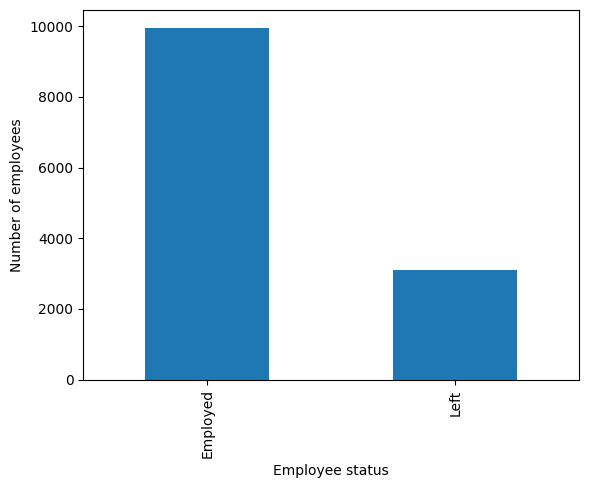

In [62]:
data_final['status'].value_counts().plot(kind='bar')
plt.xlabel('Employee status')
plt.ylabel('Number of employees')

In [63]:
data_final['status'].value_counts()

Employed    9961
Left        3092
Name: status, dtype: int64

#### Out of 13203 employees, 3112 left and 10091 stayed. The number of employees left is approx 24% of total employment.

In [64]:
data_final.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted',
       'salary', 'satisfaction', 'status', 'tenure', 'dept_id', 'dept_name',
       'dept_head'],
      dtype='object')

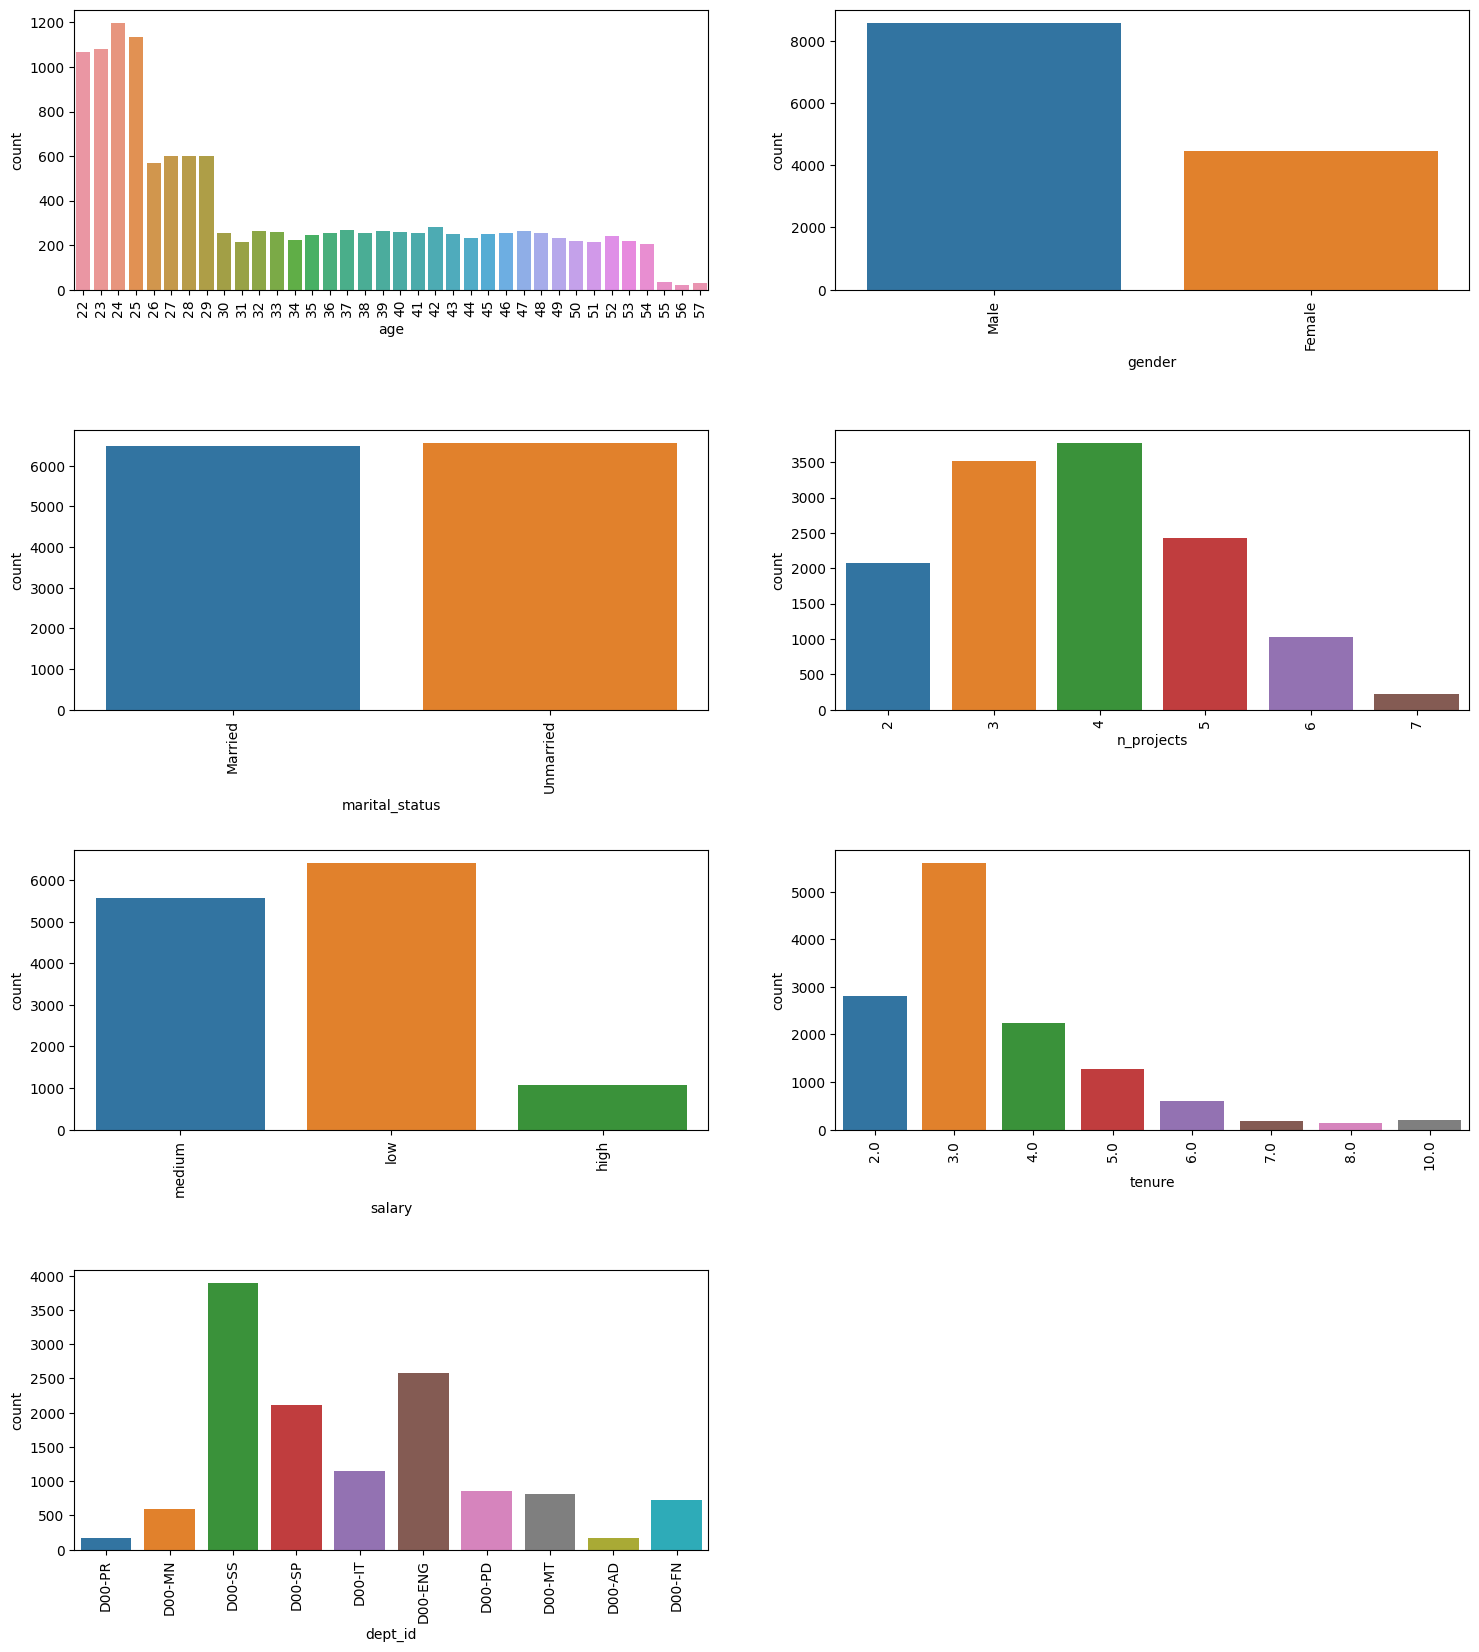

In [65]:
features=['age', 'gender', 'marital_status','n_projects', 'salary','tenure','dept_id']
fig=plt.subplots(figsize=(18,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j, data=data_final)
    plt.xticks(rotation=90)


#### Observations:
Age:
1. 24 yrs age group employees are more in company followed by 25 yrs.
2. Age can be grouped as 22-25, 26-29, 30-54 and 55-57.
3. 22-25 yrs age group has maximum nuber of employees.
4. After 25 yrs there is drastic drop in employee count which is constant till 29 yrs and same for age group 30-54.
5. 55-57 has less number of employees.

Gender:
1.Male employees are more than female employees.Male- 66%, female- 34%

Marital status:
1. There is not much difference in count of married and unmarried employees.

Number of projects:
1. Most of the employees are working on 3 to 4 projects.

Salary:
1. Most of the employees are getting salary either medium or low.

Tenure:
1. Most of the employees have worked for three years. there is huge gap in 3 years and 4 years experienced employees.

Department:
1. The sales department is having maximum number of employees followed by engineering and support.

<Axes: xlabel='last_evaluation', ylabel='Density'>

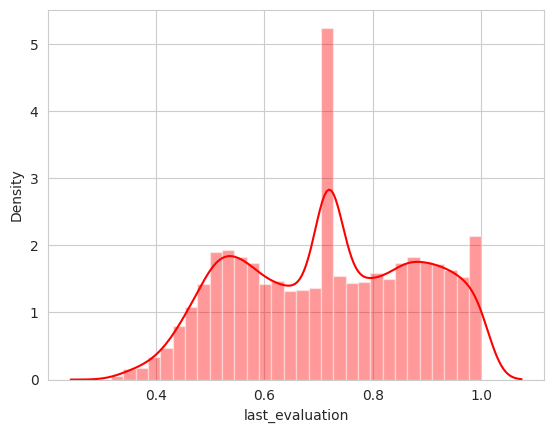

In [66]:
sns.set_style('whitegrid')
sns.distplot(data_final['last_evaluation'],kde = True, color = 'red', bins=30)

<Axes: >

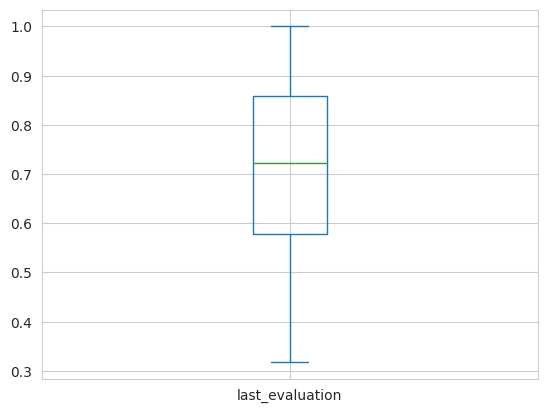

In [67]:
data_final['last_evaluation'].plot.box()

#### Observation:
1. Data looks normally distributed.
2. there are no outliers present in the data.

<Axes: xlabel='satisfaction', ylabel='Density'>

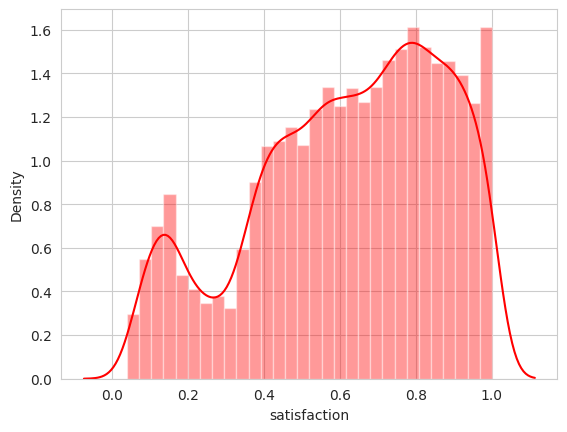

In [68]:
sns.set_style('whitegrid')
sns.distplot(data_final['satisfaction'],kde = True, color = 'red', bins=30)

<Axes: >

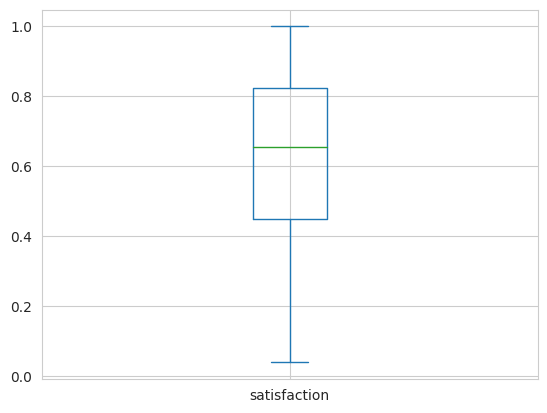

In [69]:
data_final['satisfaction'].plot.box()

#### Observation:
1. Satisfation shows bimodal distribution.
2. Which indicate employees are either less satisfied or more satisfied.

<Axes: xlabel='avg_monthly_hrs', ylabel='Density'>

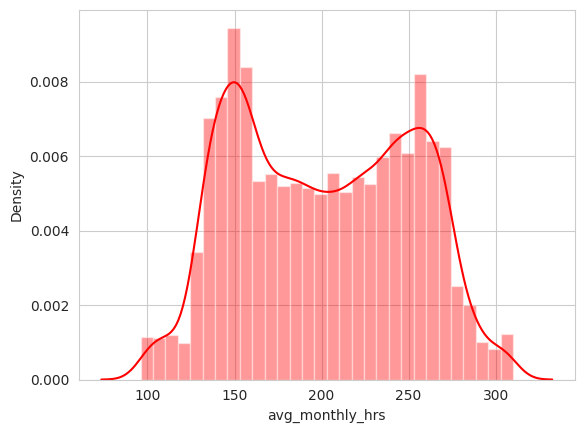

In [70]:
sns.set_style('whitegrid')
sns.distplot(data_final['avg_monthly_hrs'],kde = True, color = 'red', bins=30)

<Axes: >

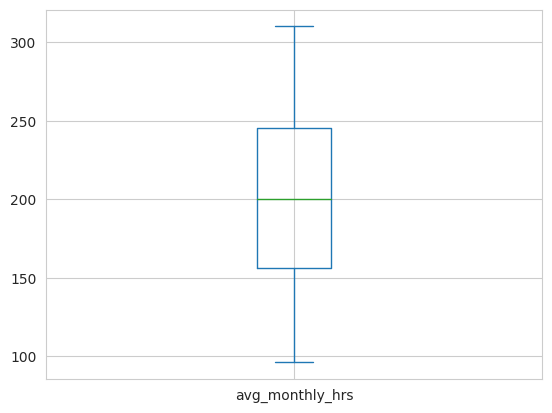

In [71]:
data_final['avg_monthly_hrs'].plot.box()

#### Observations:
1. Avg_monthly hours shows bimodal distribution where maximum employees have worked either 150 or 260 hrs.

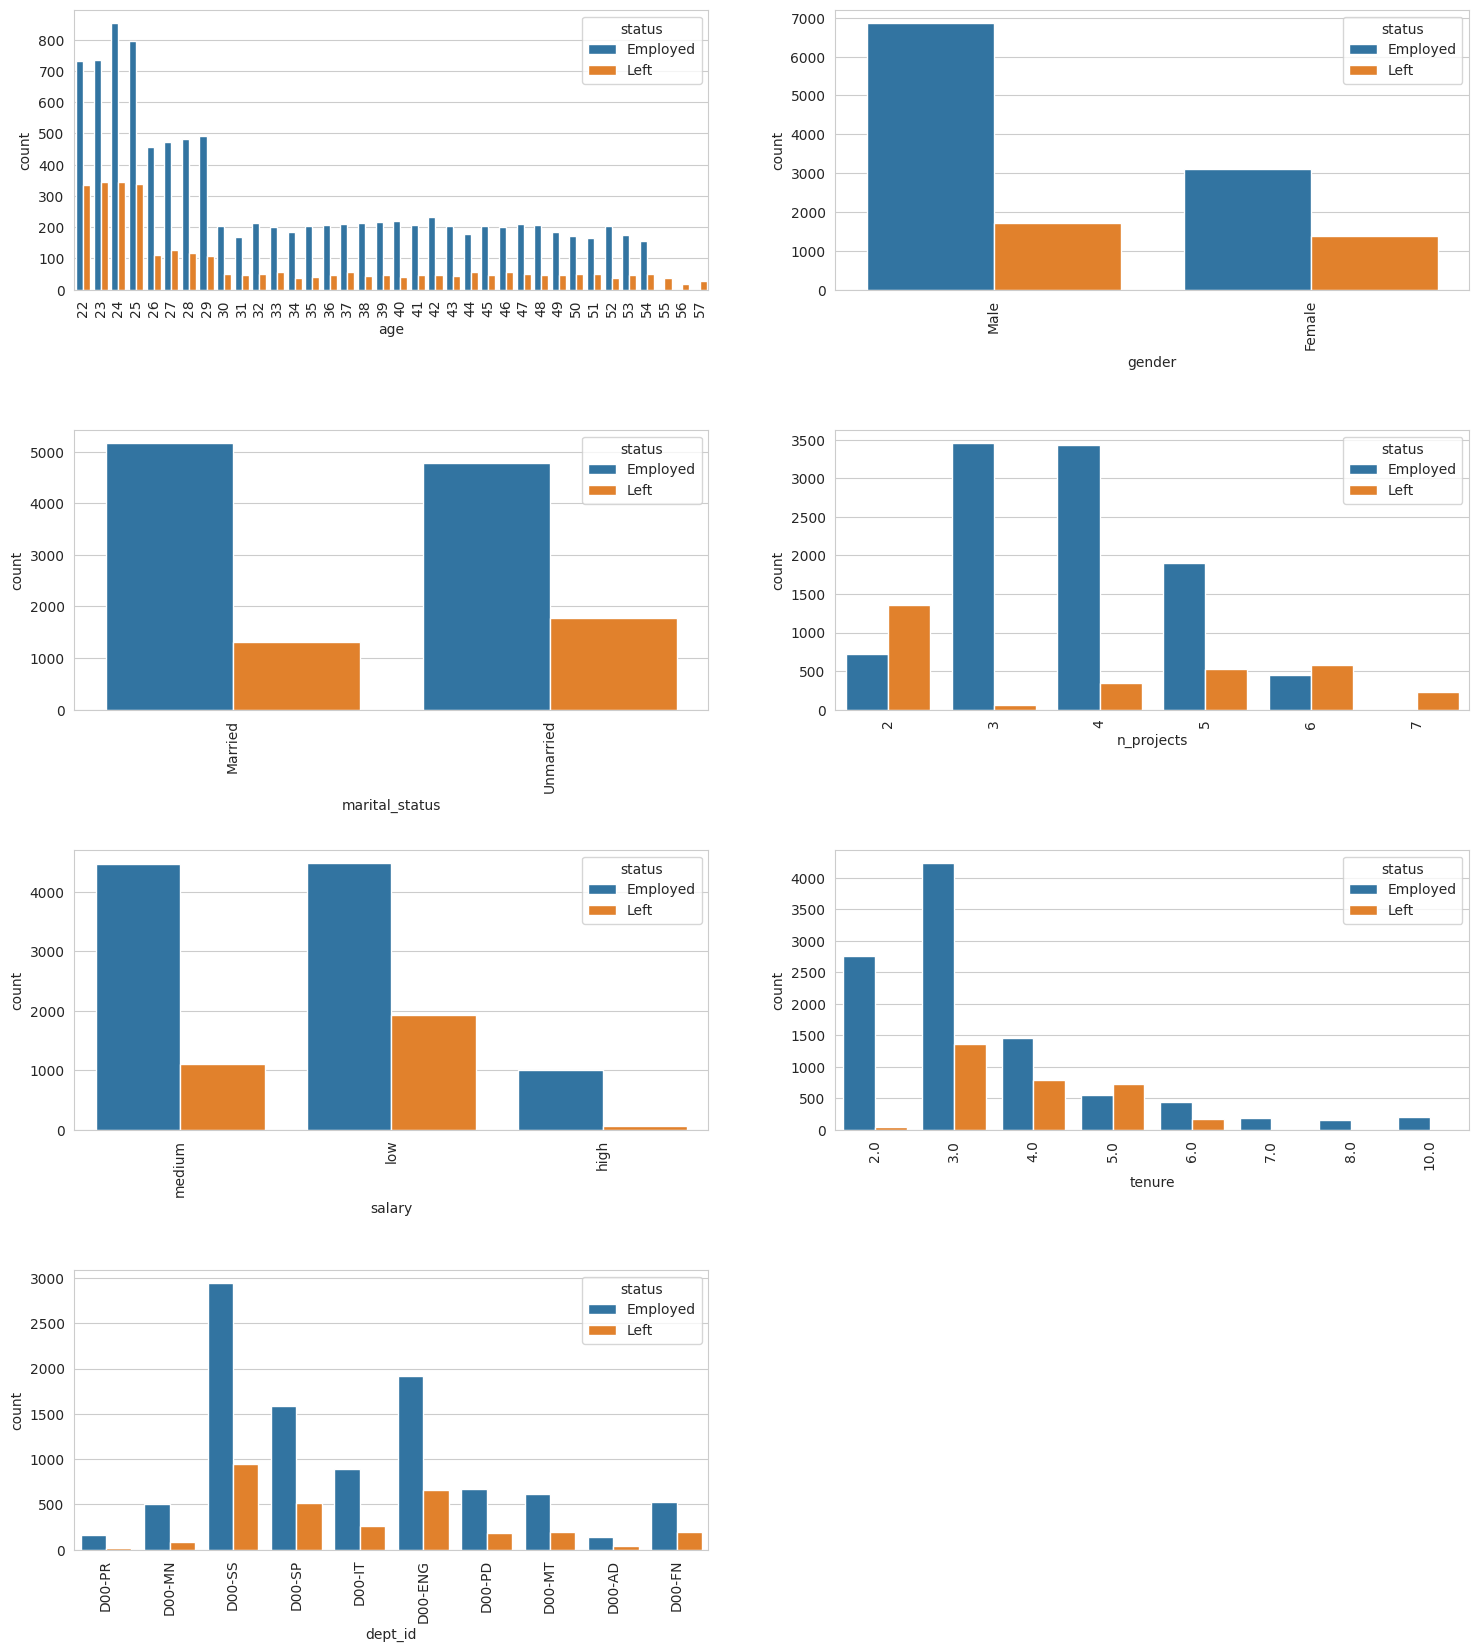

In [72]:
features=['age', 'gender', 'marital_status','n_projects', 'salary','tenure','dept_id']
fig=plt.subplots(figsize=(18,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 0.5)
    sns.countplot(x=j, data=data_final, hue='status')
    plt.xticks(rotation=90)

#### Observations:
1. Those employees who have the number of projects more than 5 were left the company. It seems to look like they were overloaded with work. The employees with less and more number of projects are likely to leave.
2. Age 22-25 yrs employees are leaving more than other age groups.
3. Employees who are getting medium or low salary have left the company.
4. Employees working for 3,4 and 5 yrs have left the company. Three year mark looks like a time to be crucial point in employee's career. Most of them quit their job around three-year mark. Another important point is 6-year point where employee is unlikely to leave.
5. Department wise from Sales, enginnering ans support department more employees have left.

Text(0, 0.5, 'Average monthly hours')

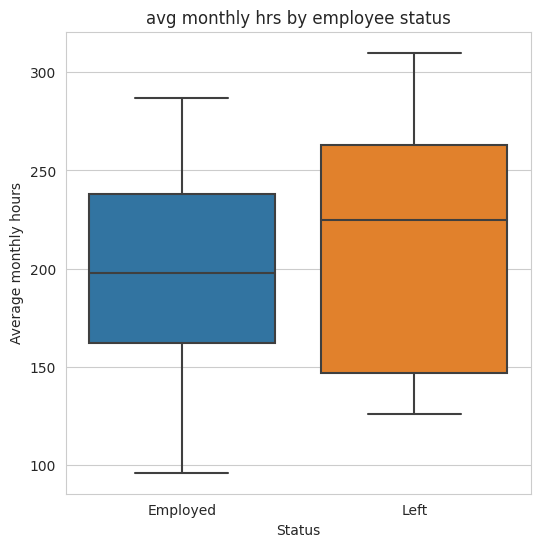

In [73]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='avg_monthly_hrs', data=data_final)
plt.title('avg monthly hrs by employee status')
plt.xlabel('Status')
plt.ylabel('Average monthly hours')

#### Observation:
1. Employees who have worked for more number of  hrs have left the company.

Text(0, 0.5, 'Last evaluation')

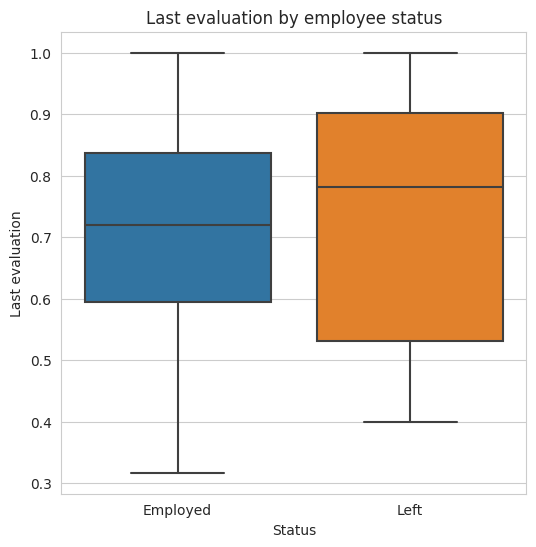

In [74]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='last_evaluation', data=data_final)
plt.title('Last evaluation by employee status')
plt.xlabel('Status')
plt.ylabel('Last evaluation')

#### Observation:
1. In case of last evaluation, it was observed that those who got good last year score, looks like are leaving the company.

Text(0, 0.5, 'Satisfaction')

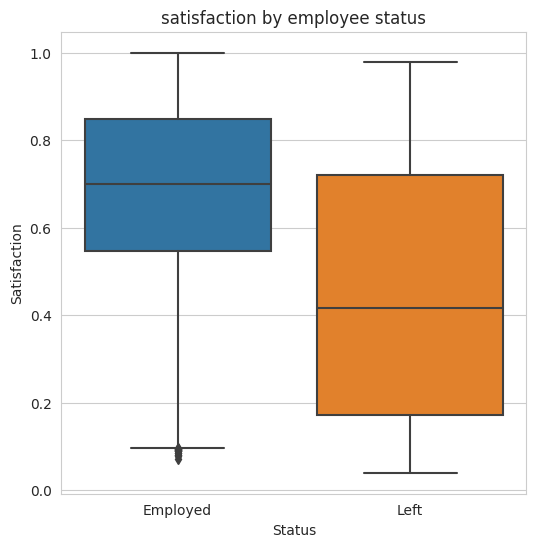

In [75]:
plt.figure(figsize=(6,6))
sns.boxplot(x='status',y='satisfaction', data=data_final)
plt.title('satisfaction by employee status')
plt.xlabel('Status')
plt.ylabel('Satisfaction')

Text(0, 0.5, 'recentlt promoted')

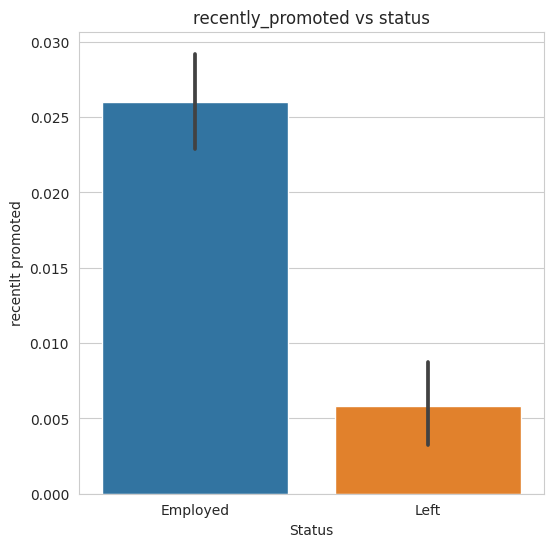

In [76]:
plt.figure(figsize=(6,6))
sns.barplot(x='status',y='recently_promoted', data=data_final)
plt.title('recently_promoted vs status')
plt.xlabel('Status')
plt.ylabel('recentlt promoted')

<Axes: >

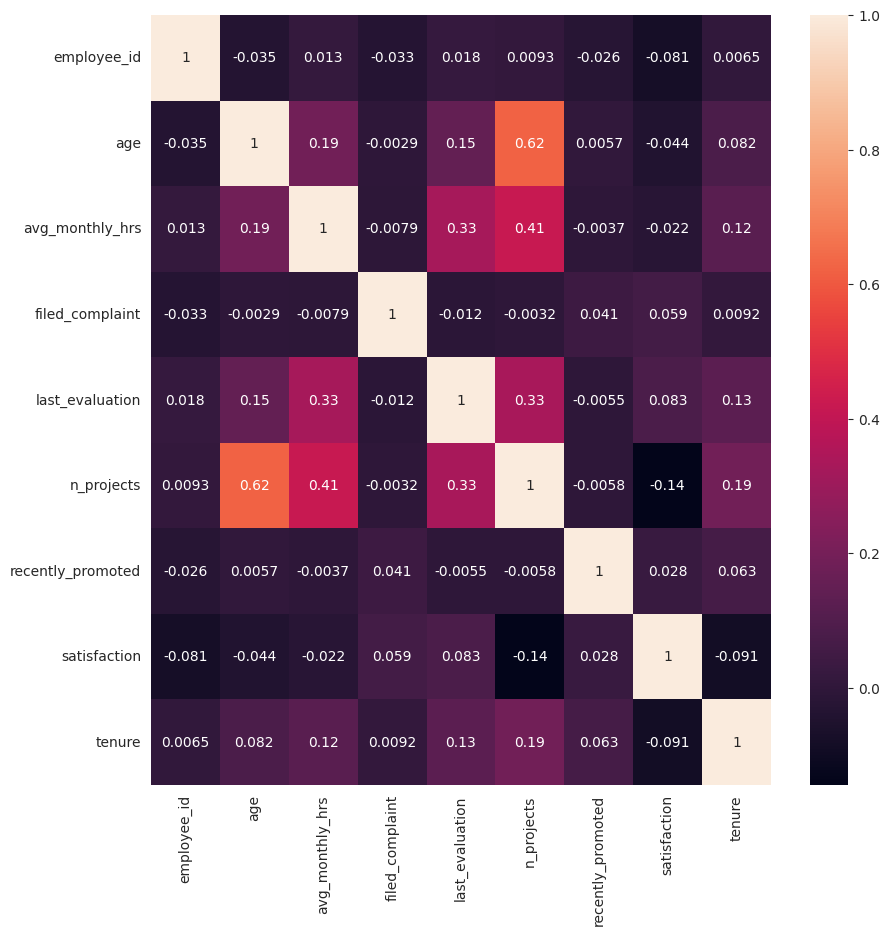

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data_final.corr(),annot=True)

#### Observations:
1. Age is highly correlated with number of projects.
2. Avg_monthly_hrs and last_evaluation are correlated with number of projects.

<a name = Section8></a>
## **8. Feature engineering**



*   The objective of feature engineering is to convert all columns into numerical values.
*   Status is updated with 'Employed' as 0 and 'Left' as 1



In [78]:
data_final_v1=data_final.drop(['status'],axis=1)

In [79]:
data_final_v1=pd.get_dummies(data_final_v1)

In [81]:
pd.set_option('display.max_columns', None)
data_final_v1.head()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,gender_Female,gender_Male,marital_status_Married,marital_status_Unmarried,salary_high,salary_low,salary_medium,dept_id_D00-AD,dept_id_D00-ENG,dept_id_D00-FN,dept_id_D00-IT,dept_id_D00-MN,dept_id_D00-MT,dept_id_D00-PD,dept_id_D00-PR,dept_id_D00-SP,dept_id_D00-SS,dept_name_Admin,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_head_Aanchal J,dept_head_Amelia Westray,dept_head_Darcy Staines,dept_head_Edward J Bayley,dept_head_Ellie Trafton,dept_head_Evelyn Tolson,dept_head_Henry Adey,dept_head_Louie Viles,dept_head_Reuben Swann,dept_head_Sushant Raghunathan K
0,113558,43,111.0,0,0.753977,5,1,0.921208,4.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,108071,36,151.0,0,0.608282,5,0,0.210300,6.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,110888,42,152.0,0,0.673508,6,0,0.720369,3.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,115694,26,167.0,0,0.874656,3,0,0.575996,4.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,107767,43,174.0,1,0.634783,5,0,0.208138,5.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
data_final['status'].unique()

array(['Employed', 'Left'], dtype=object)

In [83]:
encoding_map = {'Employed':0, 'Left':1}

In [84]:
data_final['status']=data_final['status'].map(encoding_map)

In [85]:
data_final.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,dept_id,dept_name,dept_head
0,113558,43,Male,Married,111.0,0,0.753977,5,1,medium,0.921208,0,4.0,D00-PR,Procurement,Louie Viles
1,108071,36,Male,Married,151.0,0,0.608282,5,0,medium,0.210300,0,6.0,D00-PR,Procurement,Louie Viles
2,110888,42,Male,Married,152.0,0,0.673508,6,0,medium,0.720369,0,3.0,D00-PR,Procurement,Louie Viles
3,115694,26,Male,Unmarried,167.0,0,0.874656,3,0,medium,0.575996,0,4.0,D00-PR,Procurement,Louie Viles
4,107767,43,Male,Married,174.0,1,0.634783,5,0,medium,0.208138,0,5.0,D00-PR,Procurement,Louie Viles


# Splitting data into X and y

*   Split the train and test data with 80 and 20 proportion respectively.


In [86]:
X = data_final_v1.drop(['employee_id'],axis=1)

In [87]:
y = data_final['status']

In [88]:
print(X.shape)
print(y.shape)

(13053, 45)
(13053,)


In [89]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=123)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10442, 45)
(2611, 45)
(10442,)
(2611,)


<a name = Section42></a>
## **9. Model evaluation**

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [93]:
def model_eval(actual, predicted):
    acc_score= accuracy_score(actual, predicted)
    conf_matrix=confusion_matrix(actual, predicted)
    clas_rep=classification_report(actual,predicted)
    print('model accuracy is:', acc_score)
    print(conf_matrix)
    print(clas_rep)

In [94]:
#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_test = logreg.predict(X_test)

In [95]:
model_eval(y_train, y_pred_train)

model accuracy is: 0.7983144991380962
[[7379  583]
 [1523  957]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      7962
           1       0.62      0.39      0.48      2480

    accuracy                           0.80     10442
   macro avg       0.73      0.66      0.68     10442
weighted avg       0.78      0.80      0.78     10442



In [96]:
model_eval(y_test, y_pred_test)

model accuracy is: 0.802757564151666
[[1876  123]
 [ 392  220]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1999
           1       0.64      0.36      0.46       612

    accuracy                           0.80      2611
   macro avg       0.73      0.65      0.67      2611
weighted avg       0.78      0.80      0.78      2611



Result: LogisticRegression

1.   Has moderate Bias 80%
2.   Has moderate variance 80%       
        

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds_rf_train = rf.predict(X_train)
preds_rf_test = rf.predict(X_test)

In [98]:
model_eval(y_train, preds_rf_train)

model accuracy is: 1.0
[[7962    0]
 [   0 2480]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7962
           1       1.00      1.00      1.00      2480

    accuracy                           1.00     10442
   macro avg       1.00      1.00      1.00     10442
weighted avg       1.00      1.00      1.00     10442



In [99]:
model_eval(y_test, preds_rf_test)

model accuracy is: 0.972041363462275
[[1985   14]
 [  59  553]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1999
           1       0.98      0.90      0.94       612

    accuracy                           0.97      2611
   macro avg       0.97      0.95      0.96      2611
weighted avg       0.97      0.97      0.97      2611



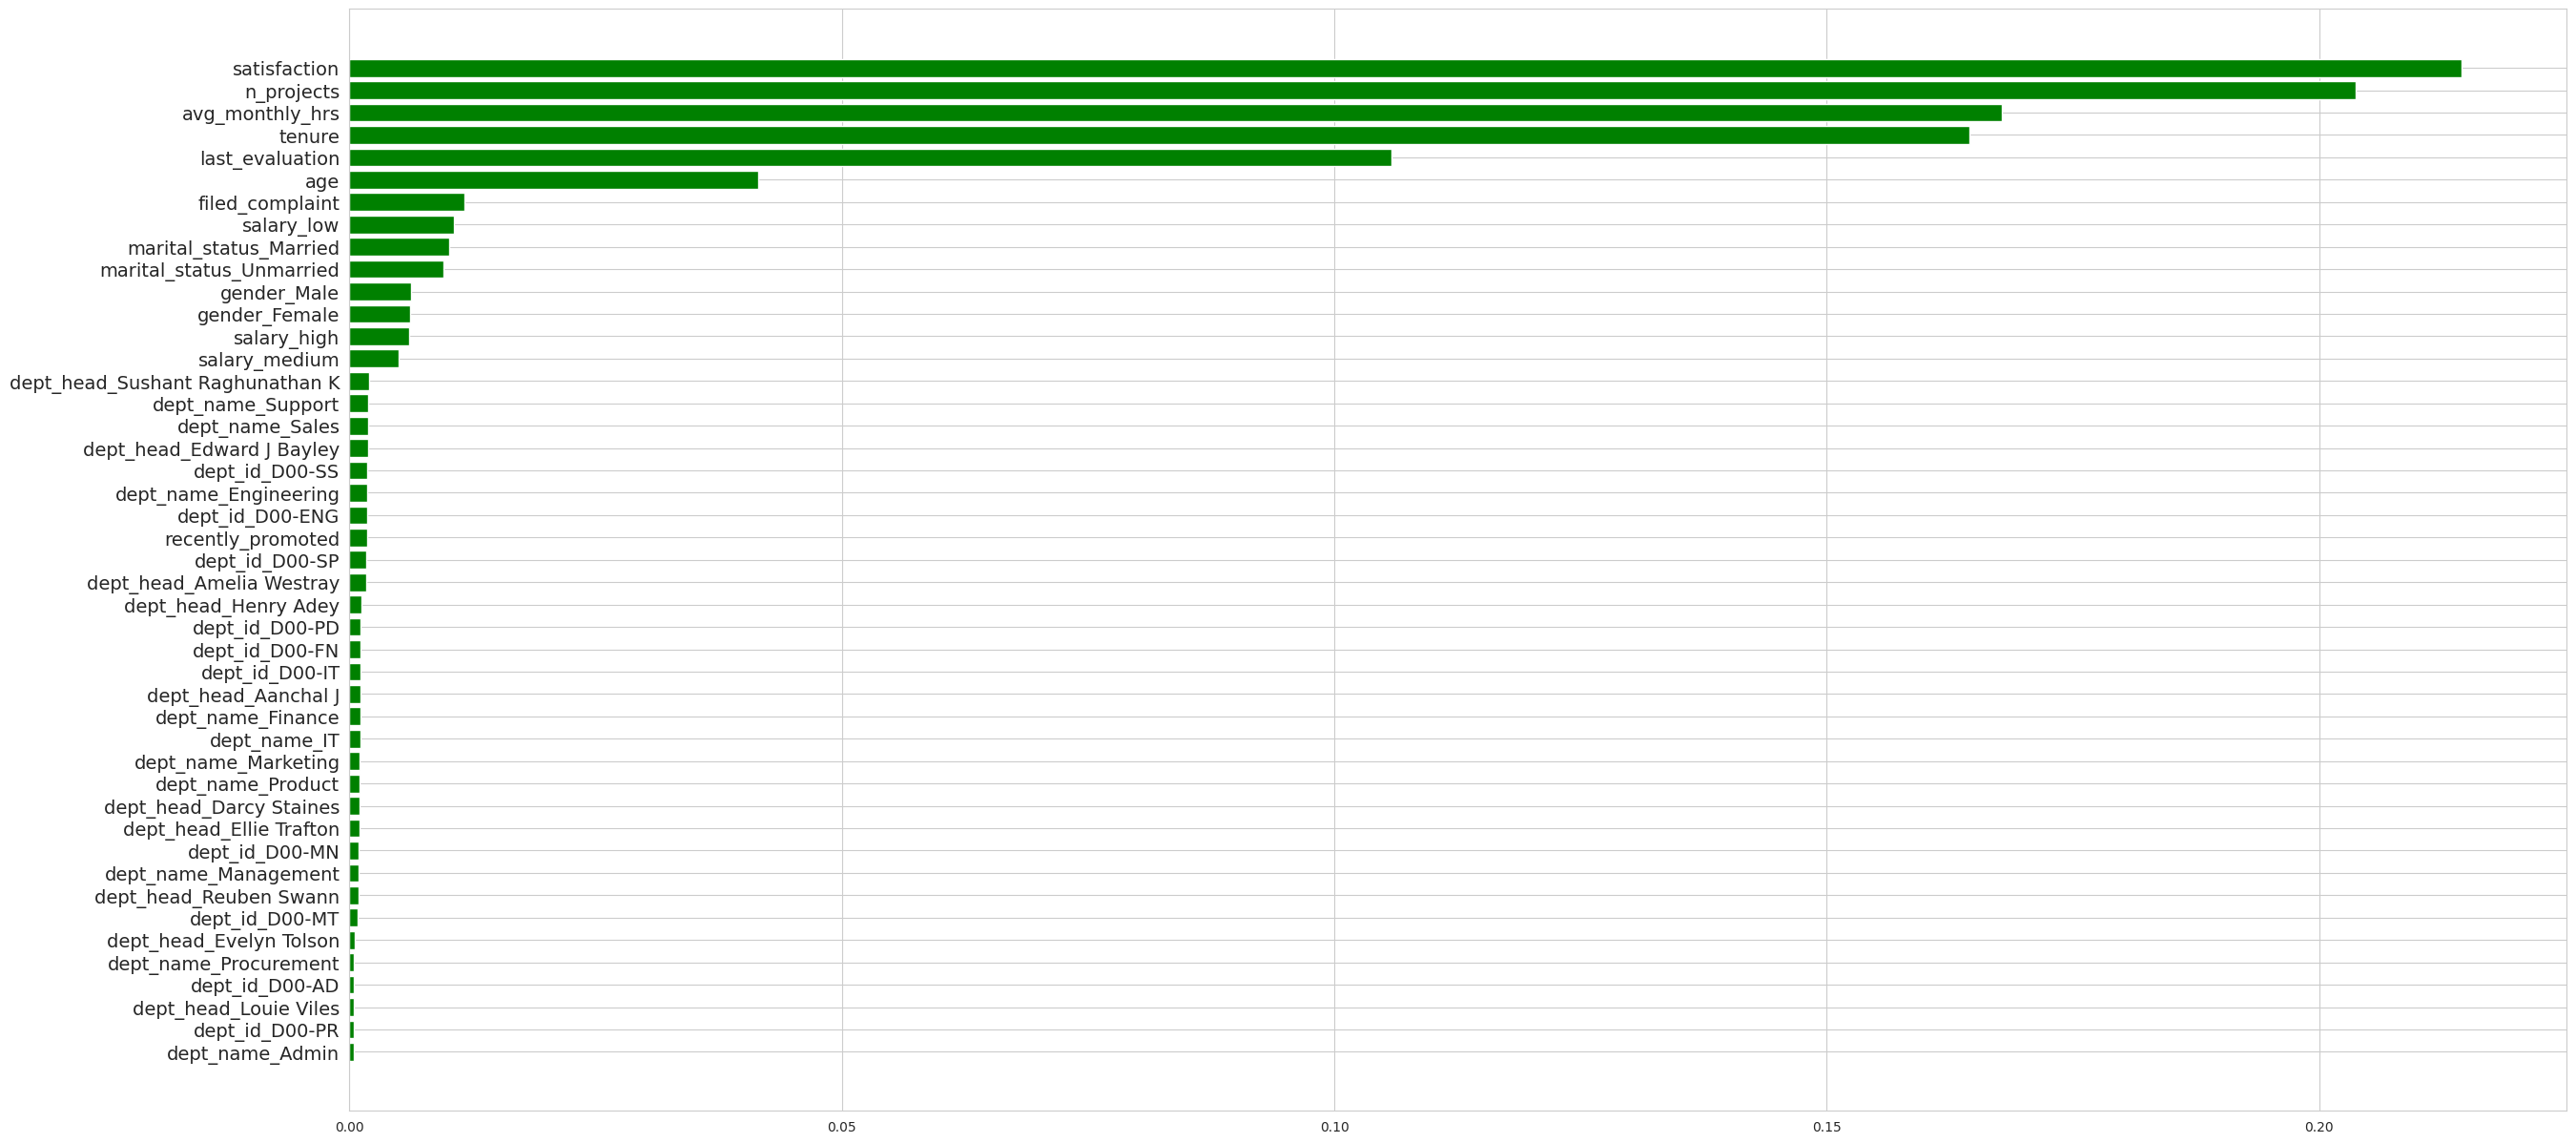

In [100]:
features = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=[30, 15])
plt.barh(y=range(len(indices)), width=importances[indices], color='g', align='center')
plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices], size=14)
plt.show()

In [101]:
feature_scores=pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

satisfaction                       0.214396
n_projects                         0.203720
avg_monthly_hrs                    0.167767
tenure                             0.164446
last_evaluation                    0.105780
age                                0.041477
filed_complaint                    0.011675
salary_low                         0.010594
marital_status_Married             0.010151
marital_status_Unmarried           0.009517
gender_Male                        0.006259
gender_Female                      0.006141
salary_high                        0.006086
salary_medium                      0.004965
dept_head_Sushant Raghunathan K    0.001983
dept_name_Support                  0.001918
dept_name_Sales                    0.001904
dept_head_Edward J Bayley          0.001896
dept_id_D00-SS                     0.001814
dept_name_Engineering              0.001814
dept_id_D00-ENG                    0.001814
recently_promoted                  0.001774
dept_id_D00-SP                  

In [102]:
X_train.columns

Index(['age', 'avg_monthly_hrs', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'satisfaction', 'tenure',
       'gender_Female', 'gender_Male', 'marital_status_Married',
       'marital_status_Unmarried', 'salary_high', 'salary_low',
       'salary_medium', 'dept_id_D00-AD', 'dept_id_D00-ENG', 'dept_id_D00-FN',
       'dept_id_D00-IT', 'dept_id_D00-MN', 'dept_id_D00-MT', 'dept_id_D00-PD',
       'dept_id_D00-PR', 'dept_id_D00-SP', 'dept_id_D00-SS', 'dept_name_Admin',
       'dept_name_Engineering', 'dept_name_Finance', 'dept_name_IT',
       'dept_name_Management', 'dept_name_Marketing', 'dept_name_Procurement',
       'dept_name_Product', 'dept_name_Sales', 'dept_name_Support',
       'dept_head_Aanchal J', 'dept_head_Amelia Westray',
       'dept_head_Darcy Staines', 'dept_head_Edward J Bayley',
       'dept_head_Ellie Trafton', 'dept_head_Evelyn Tolson',
       'dept_head_Henry Adey', 'dept_head_Louie Viles',
       'dept_head_Reuben Swann', 'dept_h

In [103]:
X1 = data_final_v1.drop(['employee_id','age', 'filed_complaint', 'recently_promoted','gender_Female', 'gender_Male', 'marital_status_Married','marital_status_Unmarried', 'salary_high', 'salary_low','salary_medium', 'dept_id_D00-AD', 'dept_id_D00-ENG', 'dept_id_D00-FN','dept_id_D00-IT', 'dept_id_D00-MN', 'dept_id_D00-MT', 'dept_id_D00-PD', 'dept_id_D00-PR', 'dept_id_D00-SP', 'dept_id_D00-SS', 'dept_name_Admin',
       'dept_name_Engineering', 'dept_name_Finance', 'dept_name_IT',
       'dept_name_Management', 'dept_name_Marketing', 'dept_name_Procurement',
       'dept_name_Product', 'dept_name_Sales', 'dept_name_Support',
       'dept_head_Aanchal J', 'dept_head_Amelia Westray',
       'dept_head_Darcy Staines', 'dept_head_Edward J Bayley',
       'dept_head_Ellie Trafton', 'dept_head_Evelyn Tolson',
       'dept_head_Henry Adey', 'dept_head_Louie Viles',
       'dept_head_Reuben Swann', 'dept_head_Sushant Raghunathan K'],axis=1)

In [105]:
X1.columns

Index(['avg_monthly_hrs', 'last_evaluation', 'n_projects', 'satisfaction',
       'tenure'],
      dtype='object')

In [106]:
X1_train, X1_test, y_train, y_test=train_test_split(X1, y, test_size=0.2, random_state=123)

In [107]:
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(10442, 5)
(2611, 5)
(10442,)
(2611,)


We will select only the top 5 features whose score is high and apply them to check the performance of various models.

In [ ]:
#logreg.fit(X1_train,y_train)
#preds_lr_train = logreg.predict(X1_train)
#preds_lr_test = logreg.predict(X1_test)

In [ ]:
#model_eval(y_train, preds_lr_train)

In [ ]:
#model_eval(y_test, preds_lr_test)

In [108]:
import xgboost as xgb

In [ ]:
#scaler = StandardScaler()
#X1_train = scaler.fit_transform(X1_train)
#X1_test = scaler.transform(X1_test)

In [109]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier()
}
results = {}
for model_name, model in models.items():
    model.fit(X1_train, y_train)
    y_pred_train = model.predict(X1_train)  # Predictions on training data
    y_pred_test = model.predict(X1_test)    # Predictions on testing data

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    classification_rep_train = classification_report(y_train, y_pred_train)
    classification_rep_test = classification_report(y_test, y_pred_test)

    results[model_name] = {
        'train_accuracy': accuracy_train,
        'test_accuracy': accuracy_test,
        'train_classification_report': classification_rep_train,
        'test_classification_report': classification_rep_test
    }

# Display results for both training and testing datasets
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print("Training Results:")
    print(f"  Accuracy: {result['train_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['train_classification_report']}\n")
    print("Testing Results:")
    print(f"  Accuracy: {result['test_accuracy']:.2f}")
    print(f"  Classification Report:\n{result['test_classification_report']}\n")

Model: Logistic Regression
Training Results:
  Accuracy: 0.77
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7962
           1       0.54      0.27      0.36      2480

    accuracy                           0.77     10442
   macro avg       0.67      0.60      0.61     10442
weighted avg       0.74      0.77      0.74     10442


Testing Results:
  Accuracy: 0.76
  Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1999
           1       0.49      0.24      0.32       612

    accuracy                           0.76      2611
   macro avg       0.65      0.58      0.59      2611
weighted avg       0.73      0.76      0.73      2611


Model: Decision Tree
Training Results:
  Accuracy: 1.00
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7962
        

Result: Gradient Boost is good with

*   Low Bias
*   Low Variance



<a name = Section10></a>
## **10. Threshold 0.7**

In [110]:
# Initialize the model
gb = GradientBoostingClassifier()

# Fit the model to the training data
gb.fit(X1_train, y_train)
y_pred_prob = gb.predict_proba(X1_test)[:, 1]                       # gives probability of class 1 (left)
threshold = 0.7
y_pred = (y_pred_prob > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")


Accuracy: 0.9643814630409805
F1 Score: 0.9207161125319694


In [111]:
# Initialize the model
ada = AdaBoostClassifier()

# Fit the model to the training data
ada.fit(X1_train, y_train)
y_pred_prob = ada.predict_proba(X1_test)[:, 1]                       # gives probability of class 1 (left)
threshold = 0.7
y_pred = (y_pred_prob > threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.7709689774032937
F1 Score: 0.04472843450479233


Even with threshold of 0.7 we found Gradient Boost performs well with both train and test dataset.


<a name = Section11></a>
## **11. Hyper parameter tuning**

In [112]:
distributions = dict(n_estimators=[50,100,150,200,250], learning_rate=[0.01,0.05,0.1,0.25,0.5,1], max_depth=[1,2,3,4,5])

In [113]:
clf=RandomizedSearchCV(gb, distributions, random_state=123, verbose=2)

In [114]:
clf.fit(X1_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   4.6s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.7s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=150; total time=   2.6s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   2.4s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.9s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END ...learning_rate=0.5, max_depth=3, n_estimators=150; total time=   1.7s
[CV] END .....learning_rate=1, max_depth=2, n_estimators=150; total time=   1.2s
[CV] END .....learning_rate=1, max_depth=2, n_es

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.25,
                                                          0.5, 1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250]},
                   random_state=123, verbose=2)

In [116]:
print(clf.best_params_)

{'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}


In [117]:
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)
gb.fit(X1_train, y_train)
preds_gb_train = gb.predict(X1_train)
preds_gb_test = gb.predict(X1_test)

In [118]:
model_eval(y_train, preds_gb_train)

model accuracy is: 0.9907105918406436
[[7936   26]
 [  71 2409]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7962
           1       0.99      0.97      0.98      2480

    accuracy                           0.99     10442
   macro avg       0.99      0.98      0.99     10442
weighted avg       0.99      0.99      0.99     10442



In [119]:
model_eval(y_test, preds_gb_test)

model accuracy is: 0.9701263883569513
[[1973   26]
 [  52  560]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1999
           1       0.96      0.92      0.93       612

    accuracy                           0.97      2611
   macro avg       0.96      0.95      0.96      2611
weighted avg       0.97      0.97      0.97      2611



Again after hyper parameter tuning Gradient Boost performs well with both train and test dataset.

<a name = Section12></a>
## **12. Cross validation**

In [120]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Assuming you've already loaded and prepared your data into X and y
model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

num_folds = 5  # You can choose the number of folds (k) as needed
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

# Perform cross-validation and store the results in a dictionary
results = cross_validate(model, X1, y, cv=cv, scoring=scoring)

# Extract and calculate the mean and standard deviation for each metric
mean_accuracy = results['test_accuracy'].mean()
mean_precision = results['test_precision'].mean()
mean_recall = results['test_recall'].mean()
mean_f1_score = results['test_f1_score'].mean()
std_f1_score = results['test_f1_score'].std()

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean Precision: {mean_precision}")
print(f"Mean Recall: {mean_recall}")
print(f"Mean F1 Score: {mean_f1_score}")
print(f"Standard Deviation of F1 Scores: {std_f1_score}")

Mean Accuracy: 0.9731096701106869
Mean Precision: 0.9591605627972773
Mean Recall: 0.9259391125680319
Mean F1 Score: 0.9422467528596712
Standard Deviation of F1 Scores: 0.006594878185410963


In [121]:
optimized_gbc = GradientBoostingClassifier(n_estimators=150, max_depth=5, learning_rate=0.1)

# Train the model on your entire training dataset.
optimized_gbc.fit(X1_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=150)

<a name = Section13></a>
## **13. Unseen Data**

In [122]:
Unseen_data=pd.read_excel(r"C:\Users\Hp\Desktop\insaid class\Capstone project major\GCD_Capstone_Project_unseen_data.xlsx")

FileNotFoundError: ignored

In [ ]:
Unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [ ]:
Unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [ ]:
Unseen_data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,100.000000,15.0,83.000000,100.000000,3.0,97.000000,97.000000,100.000000
mean,198.810000,1.0,0.744114,3.760000,1.0,0.629632,3.422680,112515.750000
std,53.185723,0.0,0.169536,1.349298,0.0,0.246901,1.566811,9466.676715
min,68.000000,1.0,0.396801,1.000000,1.0,0.051515,2.000000,100230.000000
25%,154.500000,1.0,0.576181,3.000000,1.0,0.477002,2.000000,105855.000000
50%,206.000000,1.0,0.748131,4.000000,1.0,0.660827,3.000000,110557.000000
75%,247.500000,1.0,0.901458,5.000000,1.0,0.832039,4.000000,117130.250000
max,289.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,145105.000000


In [ ]:
Unseen_data['filed_complaint']=Unseen_data['filed_complaint'].fillna(0)    # Since 1 means those who have filed complaint, for others it is given as NaN which can be replaced with zero.

In [ ]:
Unseen_data['recently_promoted']=Unseen_data['recently_promoted'].fillna(0)        # Those who got promoted are given value 1, so NaN means they dont get promoted and can be represented by zero.

In [ ]:
Unseen_data['last_evaluation'].fillna(Unseen_data['last_evaluation'].mean(),inplace=True)

In [ ]:
Unseen_data['satisfaction'].fillna(Unseen_data['satisfaction'].mean(),inplace=True)

In [ ]:
Unseen_data['tenure'].fillna(Unseen_data['tenure'].mean(),inplace=True)

In [ ]:
Unseen_data['department']=Unseen_data['department'].fillna('D00-SS')

In [ ]:
Unseen_data['filed_complaint']=Unseen_data['filed_complaint'].astype('int')

In [ ]:
Unseen_data['recently_promoted']=Unseen_data['recently_promoted'].astype('int')

In [ ]:
Unseen_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

In [ ]:
Unseen_data_f=pd.get_dummies(Unseen_data)

In [ ]:
pd.set_option('display.max_columns', None)
Unseen_data_f.head(2)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id,department_-IT,department_D00-AD,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,salary_high,salary_low,salary_medium
0,134,0,0.528841,2,0,0.400464,3.0,119045,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,221,0,0.784561,2,0,0.759513,3.0,112223,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
Unseen_data_f.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'employee_id',
       'department_-IT', 'department_D00-AD', 'department_D00-ENG',
       'department_D00-FN', 'department_D00-IT', 'department_D00-MN',
       'department_D00-MT', 'department_D00-PD', 'department_D00-PR',
       'department_D00-SP', 'department_D00-SS', 'department_D00-TP',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
X_new=Unseen_data_f.drop(['employee_id','filed_complaint',
       'recently_promoted',
       'department_-IT', 'department_D00-AD', 'department_D00-ENG',
       'department_D00-FN', 'department_D00-IT', 'department_D00-MN',
       'department_D00-MT', 'department_D00-PD', 'department_D00-PR',
       'department_D00-SP', 'department_D00-SS', 'department_D00-TP',
       'salary_high', 'salary_low', 'salary_medium'],axis=1)

In [ ]:
print("X_new shape:", X_new.shape)


X_new shape: (100, 5)


In [ ]:

import joblib

# Save the trained model to a file.
joblib.dump(optimized_gbc, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [ ]:
import joblib

# Load the trained model.
trained_model = joblib.load('gradient_boosting_model.pkl')

In [ ]:
# Assuming X_unseen is your unseen data
predictions = trained_model.predict_proba(X_new)

In [ ]:
probability_of_leaving = predictions[:, 1]

In [ ]:
probability_of_leaving= pd.DataFrame(probability_of_leaving)

In [ ]:

# Extract the "Employee ID" column from your unseen data
employee_ids = Unseen_data["employee_id"]

# Merge the "Employee ID" column with the probability predictions
result = pd.concat([employee_ids, probability_of_leaving], axis=1)

# Save the result without headers to a CSV file
result.to_csv('result.csv', index=False, header=False)

<a name = Section14></a>

---
# **14. Conclusion**
---